# Data Exploration

Here, we did a bit more analysis on the real and fake news articles that we read in.

In [1]:
import pandas as pd
import numpy as np


df_news = pd.read_csv('https://raw.githubusercontent.com/guneetskohli/DATA301/master/filtered_news.csv')
df_news.drop(['Unnamed: 0'], axis=1, inplace=True)
df_news

,title,url,content,fake,title_len,content_len
0,Sportless TV goes all nostalgic on a truly sur...,https://www.theguardian.com/sport/2020/mar/15/...,"So, the show doesn’t have to go on after all. ...",0,13,862
1,Nation Perplexed By 16-Year-Old Who Doesn’t Wa...,https://www.theonion.com/nation-perplexed-by-1...,Following her U.N. address about the existenti...,1,10,197
2,Inconsolable Jeff Sessions Tries To Commit Sui...,https://politics.theonion.com/inconsolable-jef...,Following months of bruising criticism from De...,1,10,129
3,Israel's opposition head Benny Gantz wins supp...,https://www.theguardian.com/world/2020/mar/15/...,Israeli political parties have backed the oppo...,0,10,1053
4,"‘No Way To Prevent This,’ Says Only Nation Whe...",https://www.theonion.com/no-way-to-prevent-thi...,In the days following a violent rampage in sou...,1,12,200
...,...,...,...,...,...,...
362,"Think the world is ending? Grab a shovel, not ...",https://www.theguardian.com/lifeandstyle/comme...,A year’s worth of dried pasta? A hundred cans ...,0,15,718
363,“ We Must Protect The Pure Aryan Bloodline” Sa...,https://local.theonion.com/we-must-protect-the...,Having discovered the social media website ope...,1,17,185
364,Trump aide Mnuchin: US does not face recession...,https://www.theguardian.com/world/2020/mar/15/...,The Trump administration on Sunday sought to d...,0,11,981
365,New York City teachers threaten mass ‘sickout’...,https://www.theguardian.com/world/2020/mar/15/...,A growing revolt by teachers raised the prospe...,0,13,752


# Analysis of Words Used in Article Titles

Here, we found the top 10 words used in the fake articles and the real articles.

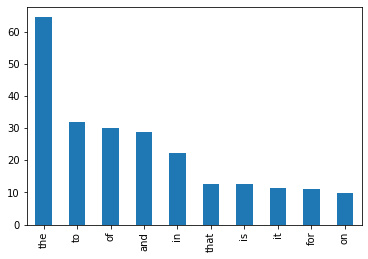

In [2]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


df_real = df_news[df_news['fake'] == 0]

vec = TfidfVectorizer()
vec.fit(df_real['content'])
tf = vec.transform(df_real['content'])
df = pd.DataFrame(
    tf.todense(),
    columns=vec.get_feature_names()
)
sumOfWords = df.sum(axis=0)
top5 = sumOfWords.sort_values(ascending=False)[:10]
top5

top5.plot.bar()


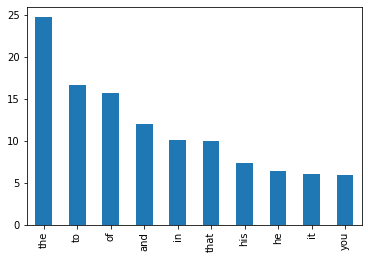

In [3]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


df_fake = df_news[df_news['fake'] == 1]

vec = TfidfVectorizer()
vec.fit(df_fake['content'])
tf = vec.transform(df_fake['content'])
df = pd.DataFrame(
    tf.todense(),
    columns=vec.get_feature_names()
)
sumOfWords = df.sum(axis=0)
top5 = sumOfWords.sort_values(ascending=False)[:10]
top5

top5.plot.bar()

We observed that fake and real articles share a lot of similar words, specifically the top 6 are the exact same.

# Analysis of Article Title and Content Lengths

Here we found the lengths of the real and fake articles' titles and content to make observations that contribute to answering our research question.

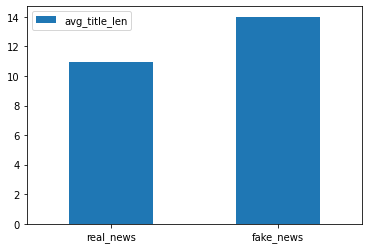

In [4]:
df_real = df_news[df_news['fake'] == 0]
df_fake = df_news[df_news['fake'] == 1]

lst_content_avg = []

lst_title_avg = []

lst_content_avg.append(df_real['content_len'].mean())
lst_content_avg.append(df_fake['content_len'].mean())

lst_title_avg.append(df_real['title_len'].mean())
lst_title_avg.append(df_fake['title_len'].mean())

index = ['real_news','fake_news']


df = pd.DataFrame({'avg_title_len': lst_title_avg}, index=index)
ax = df.plot.bar(rot=0)

This bar plot compares the average length of the titles for fake news and real news articles. From this bar plot we can see that the title length is pretty similar for fake_news and real_news articles. 

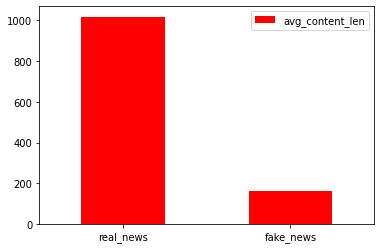

In [5]:
df = pd.DataFrame({'avg_content_len': lst_content_avg}, index=index)
ax = df.plot.bar(rot=0,color='red')

This bar plot compares the average length of the content for fake news and real news articles. From this bar plot we can see that the avergage content length is almost 5 times as much for real_news versus fake_news. 

In [6]:
from altair import *

df_news['fake'] = df_news['fake'].astype(str)

Chart(df_news).mark_circle().encode(
    x="title_len",
    y="content_len",
    color="fake"
)

alt.Chart(...)

This scatterplot compares the content length vs titles length for fake and real news. From this scatterplot we can see that the distribution of title lengths is fairly similar but the content lengths for real news is usually higher. 